### Analyzing Mobile App Data

For this project, we'll pretend we're working as data analysts for a company that builds Android and iOS mobile apps. We make our apps available on Google Play and in the App Store. The goal of our project is to help our developers understand what type of apps are likely to attract more users on Google Play and the App Store.

### Opening and Exploring the Data

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we should first try to see if we can find any relevant existing data at no cost. Luckily, here are two data sets that seem suitable for our goals:

* A dataset containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. 

* A dataset containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017.

We'll start by opening and exploring these two data sets. To make them easier to explore, we created a function named explore_data() that you can repeatedly use to print rows in a readable way.

`def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row
        if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))`

The explore_data() function does the following:

* Takes in four parameters:
     * dataset, which will be a list of lists
     * start and end, which will both be integers and represent the starting and the ending indices of a slice from the dataset
     * rows_and_columns, which will be a Boolean and has False as a default argument     
* Slices the dataset using dataset[start:end]
* Loops through the slice, and for each iteration, prints a row and adds a new line after that row using print('\n')
     * The \n in print('\n') is a special character that won't print. Instead, the \n character adds a new line, and we use print('\n') to add some blank space between rows
* Prints the number of rows and columns if rows_and_columns is True
     * dataset shouldn't have a header row, or the function will print the wrong number of rows (one more row compared to the actual length)

To help you better understand what print('\n') does, we printed three rows from the AppleStore.csv dataset below. In the first code cell, we don't use print('\n') between rows, while in the second one we do:

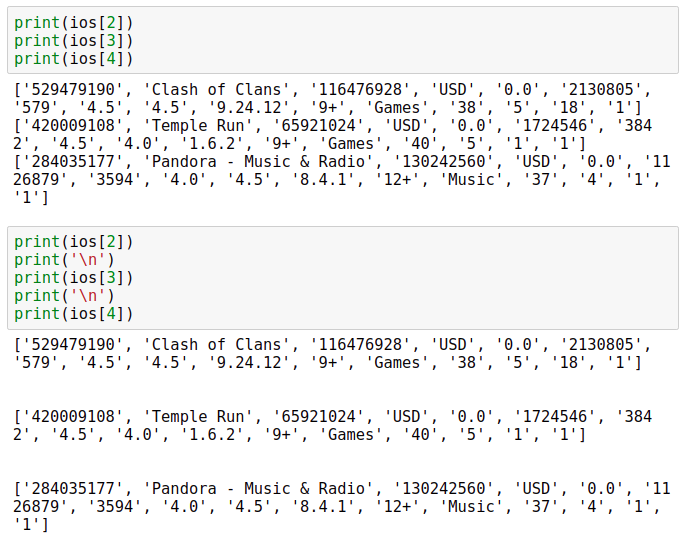

In [1]:
from csv import reader
opened_file = open('AppleStore.csv')
read_file = reader(opened_file)
apple = list(read_file)
header = apple[0]
apple = apple[1:]

In [2]:
from csv import reader
opened_file = open('googleplaystore.csv')
read_file = reader(opened_file)
android = list(read_file)
header = android[0]
android = android[1:]

In [3]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [4]:
print(apple[2])

['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


In [5]:
print('\n')

In [6]:
print(android[3])

['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


In [7]:
print('\n')

In [8]:
explore_data(apple, 0, 3, True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


In [9]:
explore_data(android, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


#### Deleting Wrong Data

Before beginning our analysis, we need to make sure the data we analyze is accurate, or the results of our analysis will be wrong. This means that we need to do the following:

* Detect inaccurate data, and correct or remove it.
* Detect duplicate data, and remove the duplicates.

Recall that at our company, we only build apps that are free to download and install, and we design them for an English-speaking audience. This means that we'll need to do the following:

* Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
* Remove apps that aren't free.

We call this process of preparing our data for analysis data cleaning. We do data cleaning before the analysis; it includes removing or correcting wrong data, removing duplicate data, and modifying the data to fit the purpose of our analysis.

It's often said that data scientists spend around 80% of their time cleaning data, and only about 20% actually analyzing (cleaned) data. In this project, we'll see that this is not far from the truth.

In the discussion section, it looks like there is an error with row 10472 in the Google Play data, so let's take a look.

In [10]:
# Determine if the error is true
print(android[10472])
print('\n')
print(header)

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [11]:
# Delete the error
print(len(android))
del android[10472]
print(len(android))

10841
10840


Using the discussion section, it looks there is a duplicate in the Apple Store data

In [12]:
# Finding duplicate data
ios_unique_apps = [] 
ios_duplicate_apps = [] 

for app in apple: 
    app_name = app[2] 

    if app_name not in ios_unique_apps:
        ios_unique_apps.append(app_name)
    else:
        ios_duplicate_apps.append(app)

print(len(ios_unique_apps))
print(len(ios_duplicate_apps))

7107
90


#### Removing Duplicate Entries: Part One

 If you explore the Google Play data set long enough or look at the discussions section, you'll notice some apps have duplicate entries. For instance, Instagram has four entries:
 
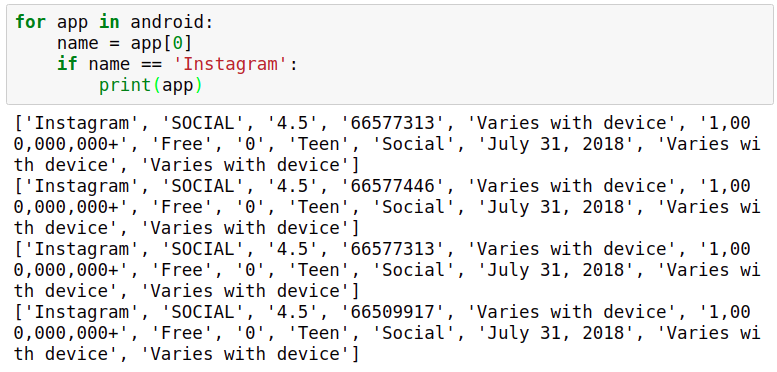

In total, there are 1,181 cases where an app occurs more than once:

`duplicate_apps = []
unique_apps = []
for app in andriod:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)       
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:15])
Number of duplicate apps: 1181`

Above, we did the following:

* Created two lists: one for storing the name of duplicate apps, and one for storing the name of unique apps.
* Looped through the android data set (the Google Play data set), and for each iteration, we did the following:
     *  We saved the app name to a variable named name.
     * If name was already in the unique_apps list, we appended name to the duplicate_apps list.
     * Else (if name wasn't already in the unique_apps list), we appended name to the unique_apps list.
      
(As a side note, you may notice we used the in operator above to check for membership in a list. We only learned to use in to check for membership in dictionaries, but in also works with lists):

`app_names = ['Instagram', 'Facebook']
print('Instagram' in app_names)
print('Twitter' in app_names)
print(232 in app_names)
print('Facebook' in app_names)`

We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is remove the duplicate rows randomly, but we could probably find a better way.

If you examine the rows we printed for the Instagram app, the main difference happens on the fourth position of each row, which corresponds to the number of reviews. The different numbers show the data was collected at different times.

`for app in andriod:
    name = app[0]
    if name == 'Instagram':
        print(app)`

We can use this information to build a criterion for removing the duplicates. The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.

In [13]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:3])
print('\n')
print('Expected length:', len(android) - 1181)

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business']


Expected length: 9659


The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.

#### Removing Duplicate Entries: Part Two

To remove the duplicates, we will do the following:

* Create a dictionary, where each dictionary key is a unique app name and the corresponding dictionary value is the highest number of reviews of that app.

* Use the information stored in the dictionary and create a new dataset, which will have only one entry per app (and for each app, we'll only select the entry with the highest number of reviews).

To turn the steps above into code, we'll need to use the [`not in` operator](https://docs.python.org/3/reference/expressions.html#not-in). The `not in` operator is the opposite of the `in` operator. For instance, `'z' in ['a', 'b', 'c']` returns `False` because `'z'` is not in `['a', 'b', 'c']`, but `'z' not in ['a', 'b', 'c']` returns `True` because it's true that `'z'` is *not* in the list `['a', 'b', 'c']`.

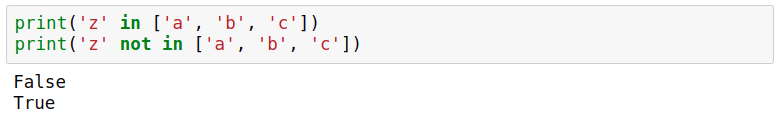

Essentially, we use both the `in` and `not in` operators to check for membership — we want to know whether a value belongs to some group of values or not. We can also use the `not in` operator to check for membership `in` a dictionary. As with the case of the in operator, the membership check is only done over the dictionary keys:

`name_and_reviews = {'Instagram': 66577313, 'Facebook': 78158306}
print('LinkedIn' not in name_and_reviews)
print('Instagram' not in name_and_reviews)
True
False`

Create a dictionary where each key is a unique app name and the corresponding dictionary value is the highest number of reviews of that app.

In [14]:
# Empty dictionary
reviews_max = {}

for app in android:
    name = app[0] # App names
    n_reviews = float(app[3]) # Convert reviews to numeric variable
    # Adding review to dictionary
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    # Not adding to dictionary    
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

print(len(reviews_max))

9659


Inspect the dictionary to make sure everything went as expected. Measure the length of the dictionary

In [15]:
# Check length of new dictionary
print('Expected length:', len(android) - 1181)
print('Actual length:', len(reviews_max))

Expected length: 9659
Actual length: 9659


Use the dictionary you created above to remove the duplicate rows:

In [16]:
# Create empty lists
android_clean = []
already_added = []

# Loop dataset to remove duplicates
for app in android:
    name = app[0] # Apps names
    n_reviews = float(app[3]) # Convert reviews to numeric
    # Adding unique values to android_clean list
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

Explore android_clean dataset

In [17]:
explore_data(android_clean, 0 , 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


#### Removing Non-English Apps: Part One

Remember we use English for the apps we develop at our company, and we'd like to analyze only the apps that are designed for an English-speaking audience. However, if we explore the data long enough, we'll find that both datasets have apps with names that suggest they are not designed for an English-speaking audience.

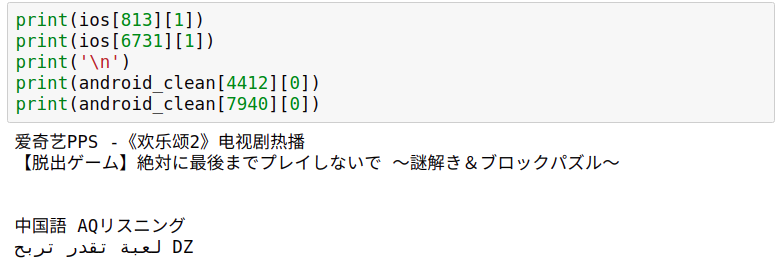

We're not interested in keeping these apps, so we'll remove them. One way to do this is to remove each app with a name containing a symbol that isn't commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;), and other symbols (+, *, /).

Each character we use in a string has a corresponding number associated with it. For instance, the corresponding number for character 'a' is 97, character 'A' is 65, and character '爱' is 29,233. We can get the corresponding number of each character using the [ord() built-in function](https://docs.python.org/3/library/functions.html#ord).

`
print(ord('a'))
print(ord('A'))
97
65`

The numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to the [ASCII](https://en.wikipedia.org/wiki/ASCII) (American Standard Code for Information Interchange) system. Based on this number range, we can build a function that detects whether a character belongs to the set of common English characters or not. If the number is equal to or less than 127, then the character belongs to the set of common English characters.

If an app name contains a character that is greater than 127, then it probably means that the app has a non-English name. Our app names, however, are stored as strings, so how could we take each individual character of a string and check its corresponding number?

In Python, strings are indexable and iterable, which means we can use indexing to select an individual character, and we can also iterate on the string using a for loop.

`
string = 'abc'
print(string[0])
print(string[1])
print(string[2])
a
b
c`

`
for character in string:
     print(character)
a
b
c`

Write a function that takes in a string and returns False if there's any character in the string that doesn't belong to the set of common English characters; otherwise, the function returns True.

In [18]:
# Create function
def character_check(string):
    for character in string:
        if ord(character) > 127:
            return False
        else:
            return True

# Checking apps names are dectected as English or non-English
print(character_check('Instagram')) # Correct
print(character_check('爱奇艺PPS -《欢乐颂2》电视剧热播'))# Correct
print(character_check('Docs To Go™ Free Office Suite')) # This is incorrect
print(character_check('Instachat 😜')) # This is incorrect

True
False
True
True


#### Removing Non-English Apps: Part Two

If we're going to use the function we've created, we'll lose useful data since many English apps will be incorrectly labeled as non-English. To minimize the impact of data loss, we'll only remove an app if its name has more than three characters with corresponding numbers falling outside the ASCII range. This means all English apps with up to three emoji or other special characters will still be labeled as English. Our filter function is still not perfect, but it should be fairly effective.

In [19]:
# Change function
def character_check(string):
    non_ascii = 0
    for character in string:
        if ord(character[:3]) > 127:
            non_ascii += 1
    if non_ascii > 3:
        return False
    else:
        return True

# Checking function
print(character_check('Docs To Go™ Free Office Suite'))
print(character_check('Instachat 😜'))
print(character_check('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
True
False


In [20]:
# Filter out non-English apps from both datasets
android_english = []
apple_english = []

# Android dataset
for app in android:
    name = app[0]
    
    if character_check(name):
        android_english.append(app)

# Apple dataset
for app in apple:
    name = app[1]
    
    if character_check(name):
        apple_english.append(app)

In [21]:
# Explore datasets
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(apple_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10795
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+

#### Isolating the Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

Isolating the free apps will be our last step in the data cleaning process.

In [22]:
# Filter by only free apps
android_final = []
apple_final = []

## Android dataset
for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
## Apple dataset
for app in apple_english:
    price = app[4]
    if price == '0.0':
        apple_final.append(app)

# Check length of each datasets
print(len(android_final))
print(len(apple_final))

9999
3222


#### Most Common Apps by Genre: Part One

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

   1. Build a minimal Android version of the app, and add it to Google Play.
   2. If the app has a good response from users, we then develop it further.
   3. If the app is profitable after six months, we also build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both the App Store and Google Play, we need to find app profiles that are successful on both markets. For instance, a profile that might work well for both markets might be a productivity app that makes use of gamification.

With the information provided above, We can understand that our end goal is to make and publish an app on both app store and google play store, so, We need to analyse data from both markets, and see which ones are doing goood in both.

We will start by analyzing the most common genres for each market, To do this we will make a frequency table for both datasets using the column prime_genre for app store dataset and Category and genre for android datset.

#### Most Common Apps by Genre: Part Two

Our conclusion was that we'll need to build a frequency table for the prime_genre column of the App Store data set, and for the Genres and Category columns of the Google Play data set.

We'll build two functions we can use to analyze the frequency tables:

* One function to generate frequency tables that show percentages

* Another function we can use to display the percentages in a descending order

We already learned to generate frequency tables that show percentages, and we're going to build a function for that in the exercise below. However, dictionaries don't have order, and it will be very difficult to analyze the frequency tables. We'll need to build a second function that can help us display the entries in the frequency table in descending order.

To do that, we'll need to make use of the built-in [sorted() function](https://docs.python.org/3/library/functions.html#sorted). This function takes in an iterable data type (like a list, dictionary, tuple, etc.), and returns a list of the elements of that iterable sorted in ascending or descending order (the `reverse` parameter controls whether the order is ascending or descending).

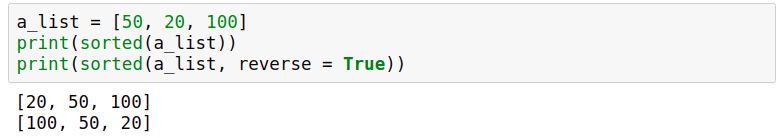

The `sorted()` function doesn't work too well with dictionaries because it only considers and returns the dictionary keys.

`
freq_table = {'Genre_1': 50, 'Genre_3': 20, 'Genre_2': 100}
sorted(freq_table)
['Genre_1', 'Genre_2', 'Genre_3']`

Did you notice that the results of sorted(freq_table) were displayed even though we did not specify the print() command? This is a feature of Jupyter — the output from the last command is displayed by default, without specifying print().

The sorted() function works well if we transform the dictionary into a list of tuples, where each tuple contains a dictionary key along with its corresponding dictionary value. To ensure the sorting works right, the dictionary value comes first, and the dictionary key comes second:

`
freq_table = {'Genre_1': 50, 'Genre_3': 20, 'Genre_2': 100}
freq_table_as_tuple = [(50, 'Genre_1'), (20, 'Genre_3'), (100, 'Genre_2')]
stored(freq_table_as_tuple)
[(20, 'Genre_2'), (50, 'Genre_1'), (100, 'Genre_2')]`

This is a bit overcomplicated to just sort a dictionary, but there are much simpler ways to do this once we learn more advanced techniques. Using the workaround above, we wrote a helper function for you named display_table(), which you'll be able to combine with the function you're going to write in the next exercise. The display_table() function you see below does the following:

* Takes in two parameters: dataset and index. dataset will be a list of lists, and index will be an integer

* Generates a frequency table using the freq_table() function (which you're going to write as an exercise)

* Transforms the frequency table into a list of tuples, then sorts the list in a descending order

* Prints the entries of the frequency table in descending order

`def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])`

In [23]:
# Create freq_table function
def freq_table(dataset, index):
    frequency_table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in frequency_table:
            frequency_table[value] += 1
        else:
            frequency_table[value] = 1
            
    table_percentages = {}
    for key in frequency_table:
        percentage = (frequency_table[key] / total) * 100
        table_percentages[key] = percentage
        
    return table_percentages

# Copy `display_table()` function
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

#### Most Common Apps by Genre: Part Three

Remember our dataset only contains free English apps, so you should be careful not to extend your conclusions beyond that scope. If you find that gaming apps are the most numerous among the free English apps on Google Play, it doesn't mean we'll see the same pattern on Google Play as a whole.

Analyze the frequency table you generated for the prime_genre column of the App Store dataset.

In [27]:
# prime_genre column frequency table
display_table(apple, 11)

Games : 53.66124774211477
Entertainment : 7.433652910935113
Education : 6.294289287203002
Photo & Video : 4.849242740030569
Utilities : 3.4458802278727245
Health & Fitness : 2.501042100875365
Productivity : 2.473252744198972
Social Networking : 2.3204112824788106
Lifestyle : 2.0008336807002918
Music : 1.9174656106711132
Shopping : 1.6951507572599693
Sports : 1.5839933305543976
Book : 1.5562039738780047
Finance : 1.445046547172433
Travel : 1.1254689453939142
News : 1.0421008753647354
Weather : 1.0004168403501459
Reference : 0.8892594136445742
Food & Drink : 0.8753647353063776
Business : 0.7919966652771988
Navigation : 0.6391552035570377
Medical : 0.31957760177851885
Catalogs : 0.1389467833819647


Games is the most popular genre of app by far, followed by Entertainment and Education. It seems like practical apps like education are less common than apps made for entertainment.

In [25]:
# genre column frequency table
display_table(android, 9)

Tools : 7.767527675276753
Entertainment : 5.747232472324723
Education : 5.064575645756458
Medical : 4.271217712177122
Business : 4.243542435424354
Productivity : 3.911439114391144
Sports : 3.671586715867159
Personalization : 3.616236162361624
Communication : 3.5701107011070112
Lifestyle : 3.5147601476014763
Finance : 3.3763837638376386
Action : 3.367158671586716
Health & Fitness : 3.1457564575645756
Photography : 3.0904059040590406
Social : 2.7214022140221403
News & Magazines : 2.61070110701107
Shopping : 2.3985239852398523
Travel & Local : 2.370848708487085
Dating : 2.158671586715867
Books & Reference : 2.1309963099630997
Arcade : 2.029520295202952
Simulation : 1.8450184501845017
Casual : 1.7804428044280445
Video Players & Editors : 1.595940959409594
Puzzle : 1.2915129151291513
Maps & Navigation : 1.2638376383763839
Food & Drink : 1.1715867158671587
Role Playing : 1.0055350553505535
Strategy : 0.9870848708487084
Racing : 0.904059040590406
House & Home : 0.8118081180811807
Libraries & 

The most common genre is tools. Practical apps seem to be more common than apps for entertainment

In [26]:
# Category column frequecy table
display_table(android, 1)

FAMILY : 18.19188191881919
GAME : 10.55350553505535
TOOLS : 7.776752767527675
MEDICAL : 4.271217712177122
BUSINESS : 4.243542435424354
PRODUCTIVITY : 3.911439114391144
PERSONALIZATION : 3.616236162361624
COMMUNICATION : 3.5701107011070112
SPORTS : 3.5424354243542435
LIFESTYLE : 3.5239852398523985
FINANCE : 3.3763837638376386
HEALTH_AND_FITNESS : 3.1457564575645756
PHOTOGRAPHY : 3.0904059040590406
SOCIAL : 2.7214022140221403
NEWS_AND_MAGAZINES : 2.61070110701107
SHOPPING : 2.3985239852398523
TRAVEL_AND_LOCAL : 2.3800738007380073
DATING : 2.158671586715867
BOOKS_AND_REFERENCE : 2.1309963099630997
VIDEO_PLAYERS : 1.6143911439114391
EDUCATION : 1.4391143911439115
ENTERTAINMENT : 1.3745387453874538
MAPS_AND_NAVIGATION : 1.2638376383763839
FOOD_AND_DRINK : 1.1715867158671587
HOUSE_AND_HOME : 0.8118081180811807
LIBRARIES_AND_DEMO : 0.7841328413284132
AUTO_AND_VEHICLES : 0.7841328413284132
WEATHER : 0.7564575645756457
ART_AND_DESIGN : 0.5996309963099631
EVENTS : 0.5904059040590406
PARENTING : 

Family apps are the most frequent, followed by game apps. The app you should download are games and productivity apps.

#### Most Popular Apps by Genre on the App Store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

To calculate the average number of user ratings for each genre, we'll use a for loop inside of another for loop. This is an example of a for loop used inside another for loop:

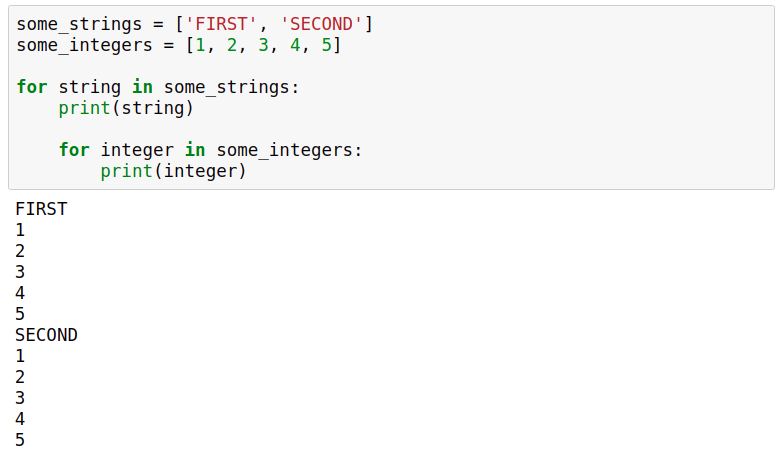

Above, we can see the following:

* We first iterate over the some_strings list, and for each iteration, we do the following:
     * We print string (iteration variable)
     * We start another iteration over the list some_integers
          * For each iteration over this list, we print integer (iteration variable)

We can see that for each of the two iterations over the list some_strings (there are two iterations because some_strings only has two list elements), there's another inner iteration happening over the list some_integers.

The second iteration over some_strings begins only when the iteration over some_integers is finished. Notice that all the elements of the list some_integers are printed for each of the two iterations over the list some_strings.

We call a loop inside another loop a **nested loop**. We'll use a nested loop to compute the averages we mentioned above. 

In [30]:
# Frequency table of prie_genre column
genre_apple = freq_table(apple_final, 11)

for genre in genre_apple:
    total = 0
    len_genre = 0
    
    for app in apple_final:
        genre_app = app[-5]
        if genre_app == genre:
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [31]:
for app in apple_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number. Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [32]:
for app in apple_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

#### Most Popular Apps by Genre on Google Play

We have data about the number of installs for the Google Play market, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

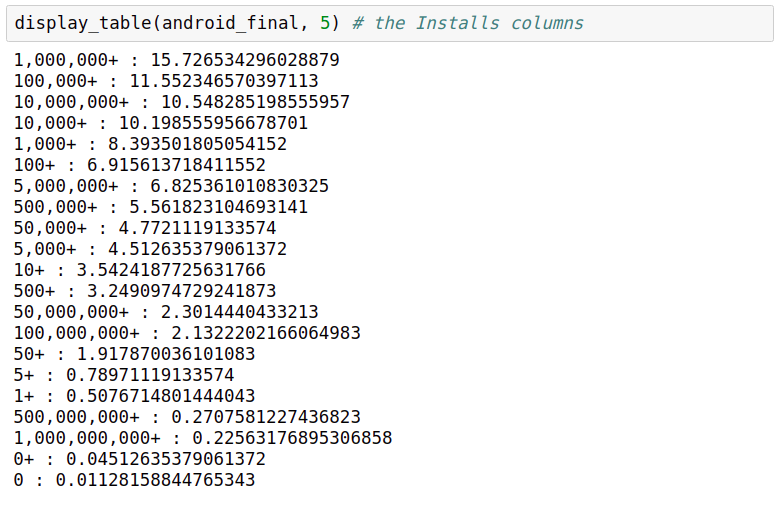

For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to find out which app genres attract the most users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on. To perform computations, however, we'll need to convert each install number from a string to a float. This means we need to remove the commas and the plus characters, or the conversion will fail and cause an error.

To remove characters from strings, we can use the [str.replace(old, new) method](https://docs.python.org/3/library/stdtypes.html?#str.replace) (just like list.append() or list.copy(), str.replace() is a special kind of function called method — we'll learn more about this early in the next course). str.replace() takes in two parameters, old and new, and replaces all occurrences of old within a string with new:

`
n_installs = '100,000+'
print(n_installs.replace('+', 'plus'))
print(n_installs.replace('1', 'one'))
print(n_installs.replace('&', 'ampersand')) # no change
100,000plus
one00,000+
100,000+`

To remove certain characteres, we can replace them with the empty string `''`:

`
n_installs = '100,000+'
n_installs = n_installs.replace('+', ' '' ')
print(n_installs)
n_installs = n_installs.replace(',' ' '' ')
print(n_installs)
100,000
100000`

In [40]:
# Category frequency table for android dataset
category_android = freq_table(android_final, 1)

for category in category_android:
    total = 0
    len_category = 0
    
    for app in android_final:
        category_app = app[1]
        
        if category_app == category:
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
            
    avg_category_installs = total / len_category
    print(category, ':', avg_category_installs)

ART_AND_DESIGN : 2038050.8196721312
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 9655197.28643216
BUSINESS : 2250454.1348314607
COMICS : 950443.220338983
COMMUNICATION : 90935671.86908078
DATING : 1164270.7356828193
EDUCATION : 5760596.026490066
ENTERTAINMENT : 19516734.69387755
EVENTS : 253542.22222222222
FINANCE : 2511355.6790830945
FOOD_AND_DRINK : 2190710.008
HEALTH_AND_FITNESS : 4869225.852307692
HOUSE_AND_HOME : 1917187.0568181819
LIBRARIES_AND_DEMO : 749950.119047619
LIFESTYLE : 1479956.6267409471
GAME : 33111302.596789423
FAMILY : 5784094.900962083
MEDICAL : 147563.28813559323
SOCIAL : 48184458.56849315
SHOPPING : 12637504.221789883
PHOTOGRAPHY : 32321374.407051284
SPORTS : 4860918.563888889
TRAVEL_AND_LOCAL : 27921561.32520325
TOOLS : 14988276.79842932
PERSONALIZATION : 7533233.402597402
PRODUCTIVITY : 35885137.50379747
PARENTING : 542603.6206896552
WEATHER : 5747142.162162162
VIDEO_PLAYERS : 36599010.11764706
NEWS_AND_MAGAZINES : 270

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [41]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Messenger – Text and Video Chat for Free : 1,000,000,000+
WhatsApp Messenger : 1,000,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Viber Messenger : 500,000,000+
Firefox Browser fast & private : 100,000,000+
Yahoo Mail – Stay Organized : 100,000,000+
imo beta free calls and text : 100,000,000+
imo free video calls and chat : 500,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Who : 100,000,000+
WeChat : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Android Messages : 100,000,000+
Telegram : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
WhatsApp Messenger : 1,000,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Viber Messenger : 500,000,000+
Hangouts : 1,000,000